In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import seaborn as sns

### Load DataSet

In [2]:
df = pd.read_csv('Data/BostonHousing.csv')

### Explore DataSet

+ crim: Per capita crime rate by town.
+ zn: Proportion of large residential lots (over 25,000 sq. ft.).
+ indus: Proportion of non-retail business acres per town.
+ Chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).
+ nox: Concentration of nitrogen oxides in the air.
+ rm: Average number of rooms per dwelling.
+ age: Proportion of old owner-occupied units built before 1940.
+ dis: Weighted distances to Boston employment centers.
+ rad: Index of accessibility to radial highways.
+ tax: Property tax rate per $10,000.
+ ptratio: pupil-teacher ratio
+ lstat: percentage of population considered lower status
+ medv: median value of owner-occupied homes

In [3]:
df.head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### Handle Missing Value

In [7]:
df['rm'] = df['rm'].fillna(df['rm'].mean())

### Visualize Data

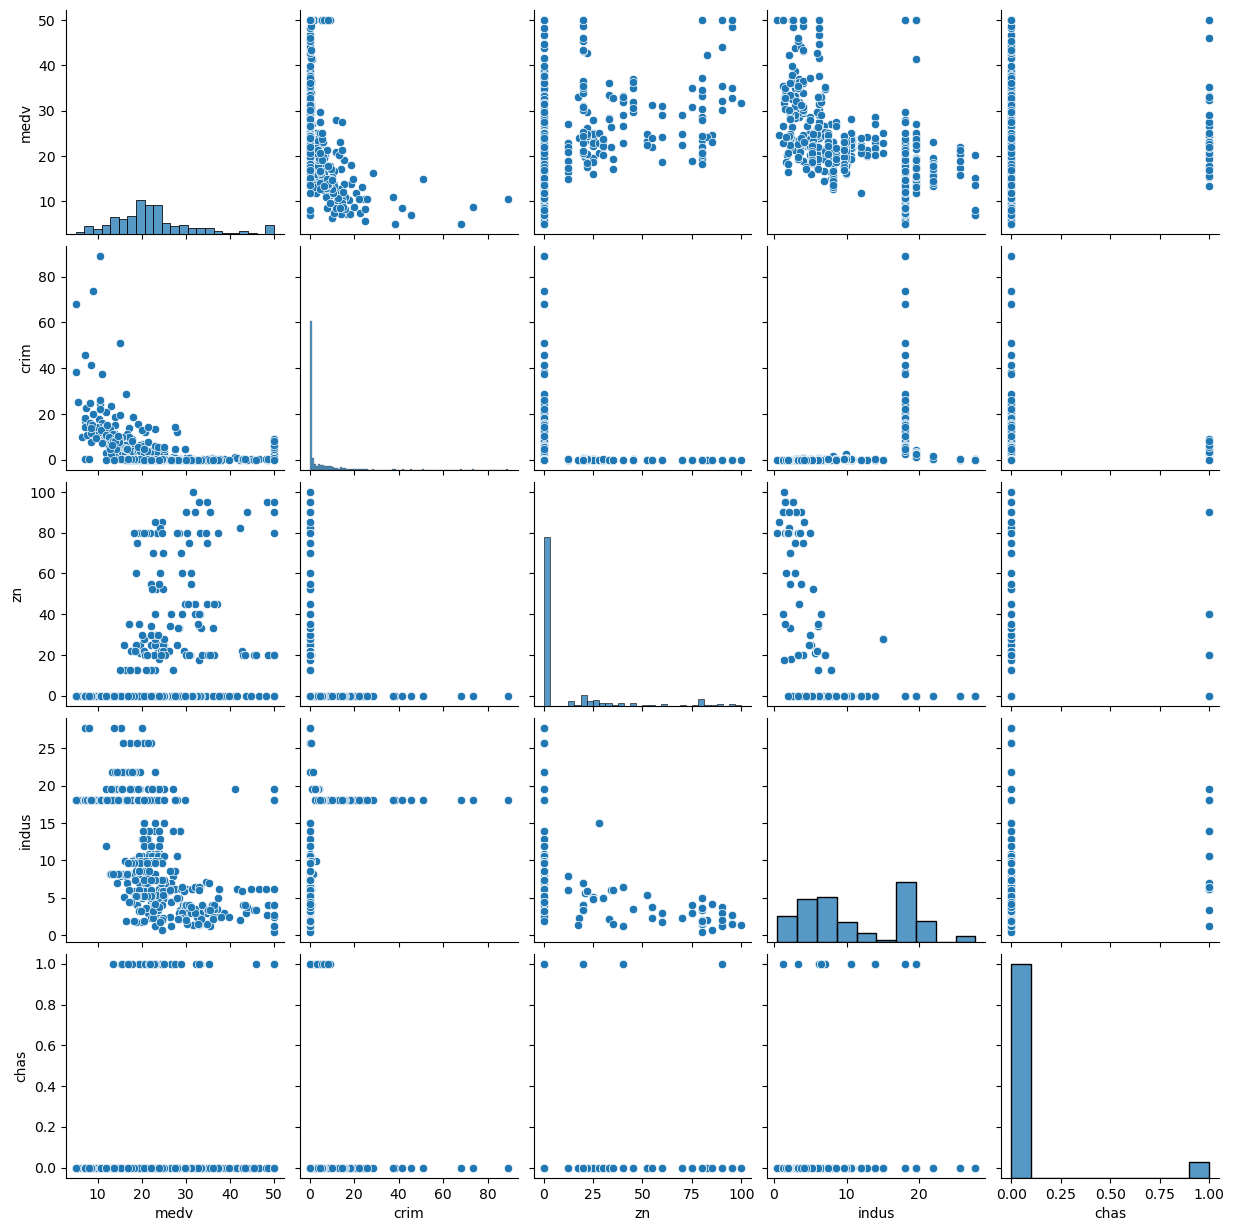

In [8]:
sns.pairplot(df, 
             vars=('medv', 'crim', 'zn', 'indus', 'chas'),
             diag_kind='hist')

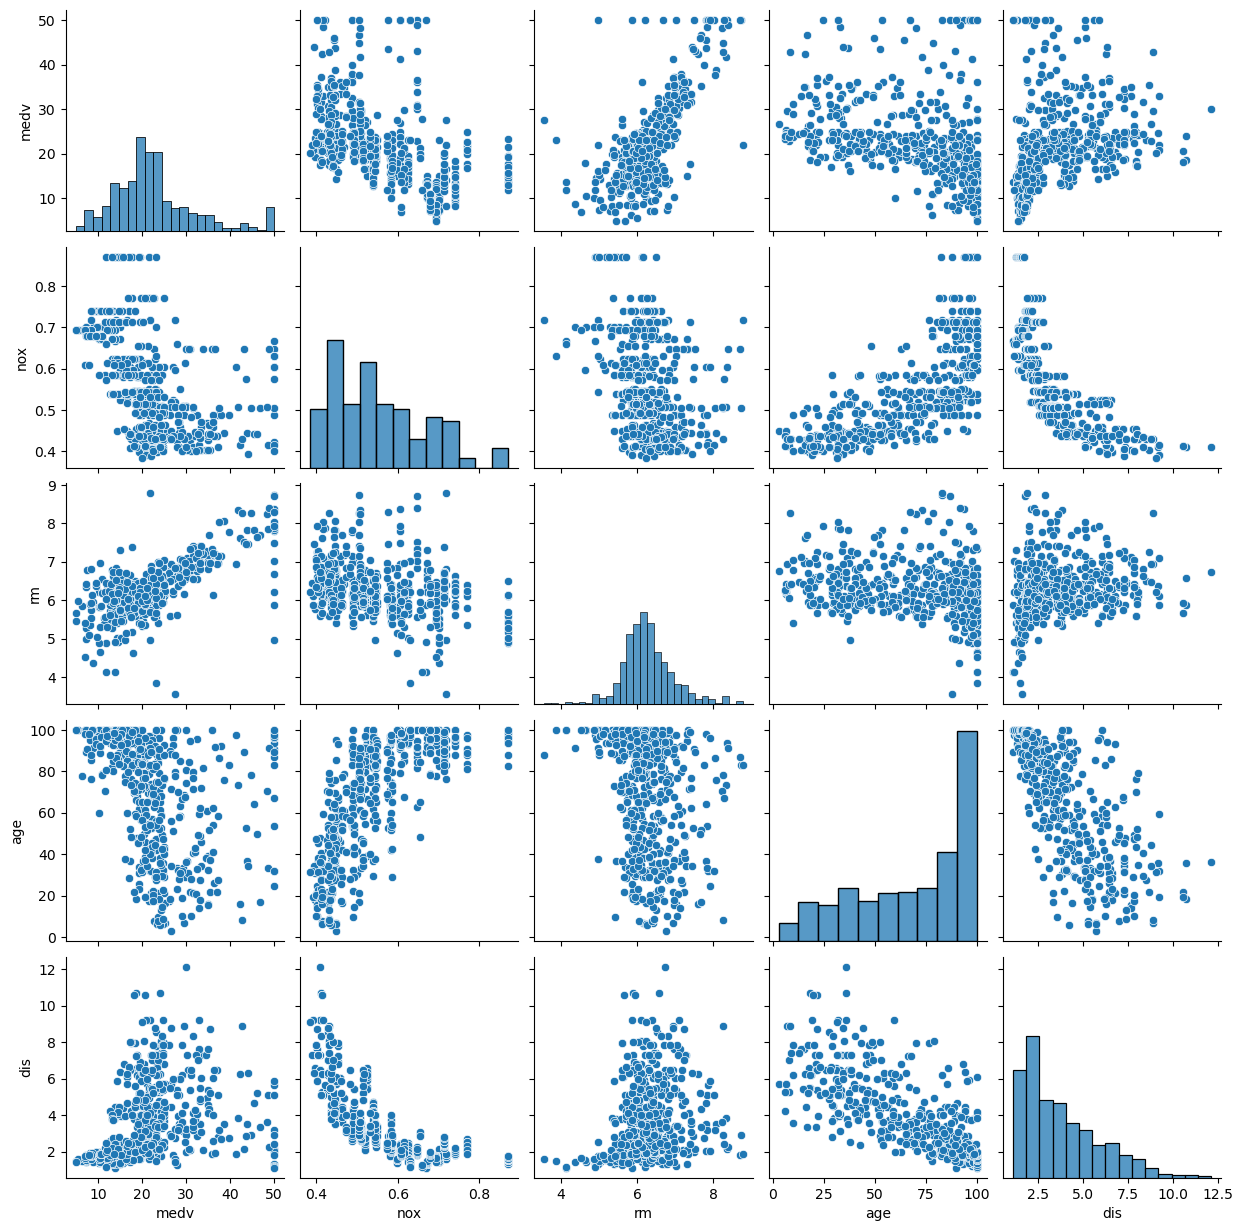

In [9]:
sns.pairplot(df, 
             vars=('medv', 'nox', 'rm', 'age', 'dis'),
             diag_kind='hist')

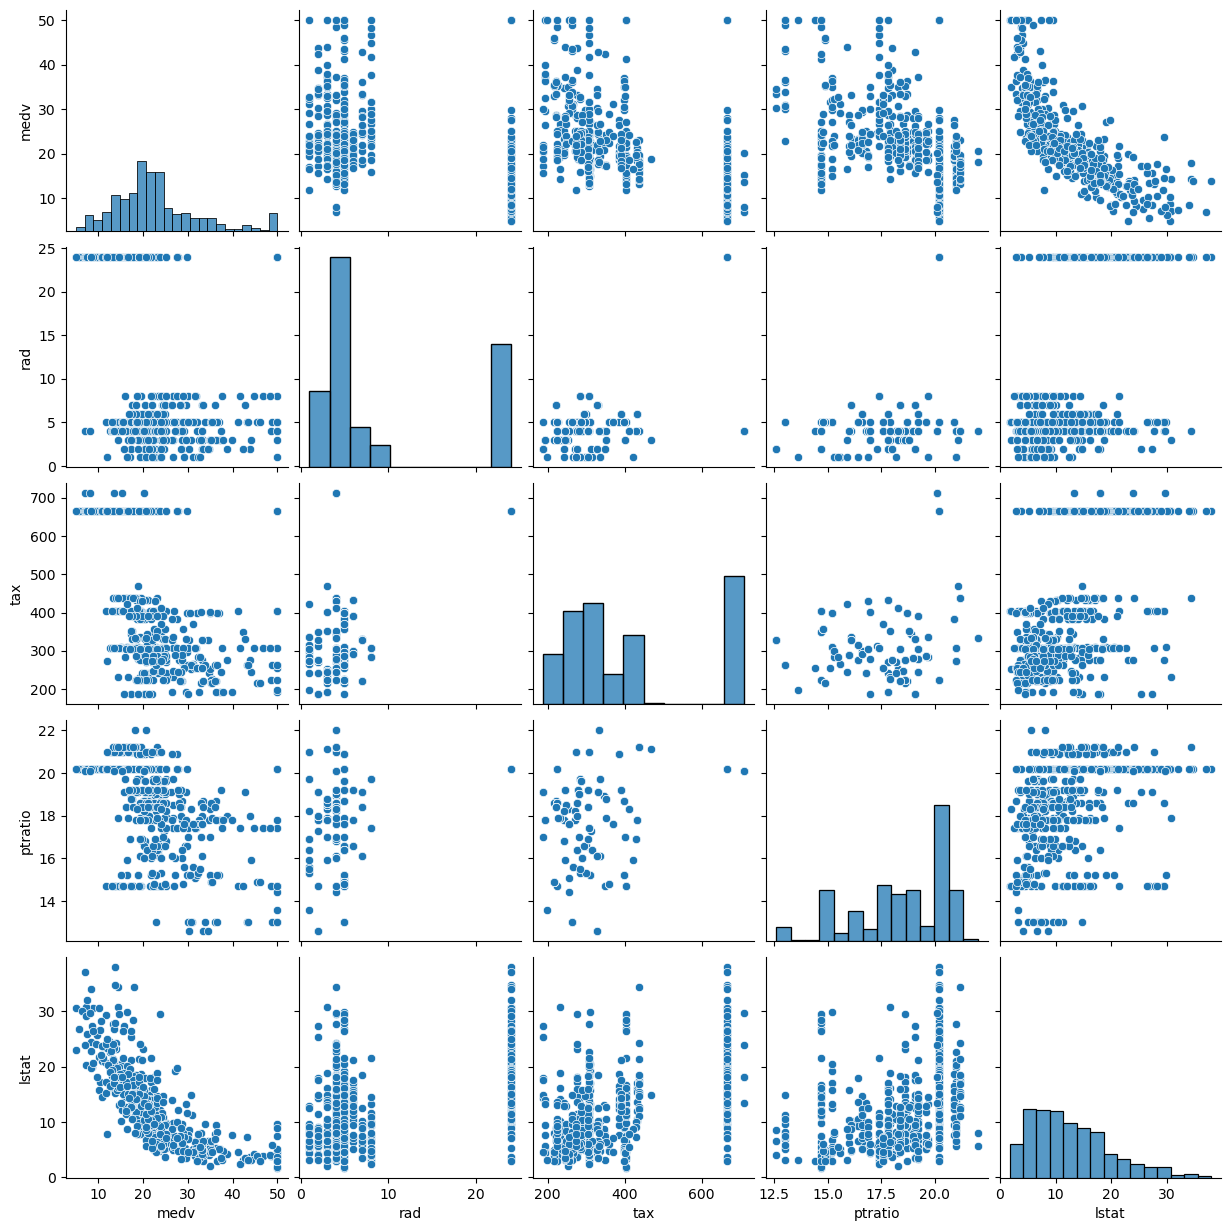

In [10]:
sns.pairplot(df, 
             vars=('medv', 'rad', 'tax', 'ptratio', 'lstat'), 
             diag_kind='hist')

### Correlation Analysis

<Axes: >

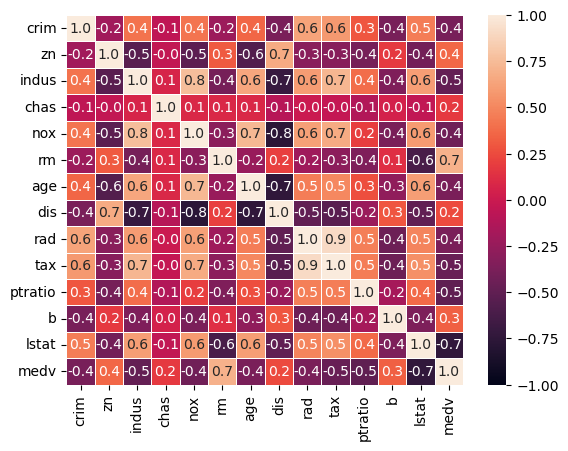

In [11]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5, fmt='.1f')

### Standardize and Cleaning Data

In [12]:
scaler = StandardScaler()
new_df = df.copy()
new_df = scaler.fit_transform(new_df)

In [13]:
df = pd.DataFrame(data=new_df, columns=df.columns)
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.414403,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194840,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.284104,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.017491,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.229926,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


<Axes: ylabel='medv'>

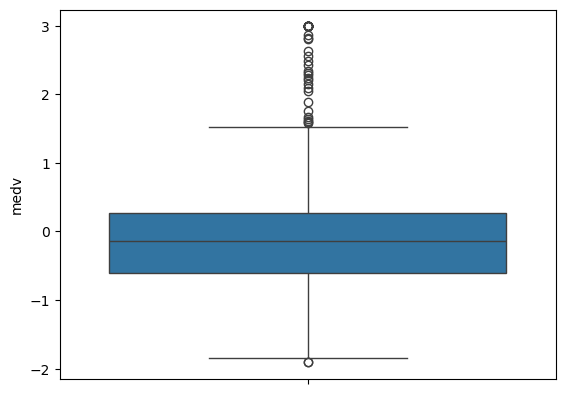

In [14]:
sns.boxplot(df['medv'])

### Update Outliers value

In [15]:
q1 = df['medv'].quantile(.25)
q3 = df['medv'].quantile(.75)
iqr = q3 - q1
u_limit = 1.5 * q3
l_limit = 1.5 * q1
q1, q3, iqr, u_limit, l_limit

(-0.5994557469772863,
 0.26852313623367563,
 0.867978883210962,
 0.40278470435051345,
 -0.8991836204659295)

In [16]:
new_df = df.loc[(df['medv'] < u_limit) & (df['medv'] > l_limit)]
print('outliers: ', len(df)-len(new_df))

outliers:  201


<Axes: ylabel='medv'>

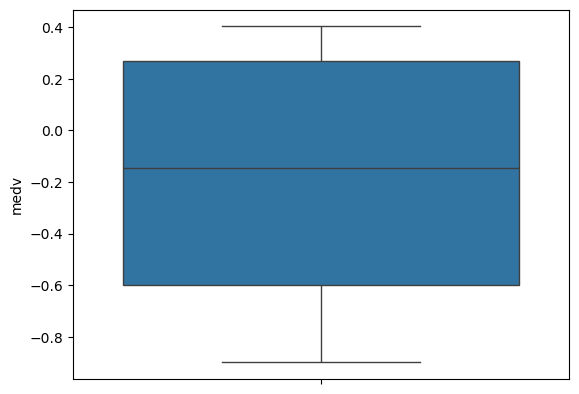

In [17]:
new_df = df.copy()
new_df.loc[(new_df['medv'] < l_limit), 'medv'] = l_limit
new_df.loc[(new_df['medv'] > u_limit), 'medv'] = u_limit
sns.boxplot(new_df['medv'])

### Split into Train and Test DataSet

In [18]:
X = new_df.drop('medv', axis=1)
Y = new_df['medv']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Save Train and Test DataSet

In [19]:
joblib.dump(X_train, 'Data/X_train.pkl') # type: ignore
joblib.dump(X_test, 'Data/X_test.pkl') # type: ignore
joblib.dump(Y_train, 'Data/Y_train.pkl') # type: ignore
joblib.dump(Y_test, 'Data/Y_test.pkl') # type: ignore

['Data/Y_test.pkl']